0~9999の整数を入力してください: 137


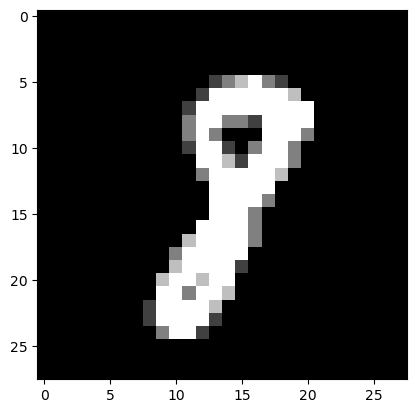

正解は:8
予測結果は:9
[[ 0.06300187  0.01429133  0.03495493 ...  0.02776751 -0.05763921
  -0.00759787]
 [-0.03198095  0.01381795 -0.01824304 ...  0.06378109  0.00453257
   0.01435676]
 [ 0.06725538 -0.04813425 -0.04537446 ...  0.03989344 -0.04699669
  -0.01648516]
 ...
 [-0.02571133  0.02809776  0.10875591 ... -0.03597355  0.03074085
   0.01763069]
 [ 0.02699757 -0.03636457 -0.00686967 ... -0.00920771 -0.00089243
   0.02344971]
 [ 0.00097252 -0.03004448  0.00856151 ... -0.06824825  0.07191712
   0.02005035]]


In [1]:
import numpy as np
import mnist

X = mnist.download_and_parse_mnist_file("train-images-idx3-ubyte.gz")
Y = mnist.download_and_parse_mnist_file("train-labels-idx1-ubyte.gz") 

import matplotlib.pyplot as plt
from pylab import cm

# シード値を固定する
np.random.seed(0)
# 画像サイズ
picture_size = 28 * 28
# 中間層の数
M = 50 
# 標準入力
i = int(input("0~9999の整数を入力してください:"))
# クラス数
C =10

# 784次元ベクトル
test_data = X[i].reshape(picture_size)

# 　d×M行列W1
W_1 = np.random.normal(0, 1/np.sqrt(picture_size), (picture_size, M))
# M次元ベクトルb1
b_1 = np.random.normal(0, 1/np.sqrt(picture_size), M)
# 中間層前の計算結果
dot_1 = np.dot(np.array(W_1).T, test_data) + b_1

y_1 = 1 / (1 + np.exp(-dot_1))

# C ×M行列W2
W_2 = np.random.normal(0, 1/np.sqrt(picture_size), (M, C))
# C次元ベクトルb2
b_2 = np.random.normal(0, 1/np.sqrt(picture_size), C)
# 出力層前の計算結果
dot_2 = np.dot(np.array(W_2).T, y_1) + b_2

#dot_2のうち、最大の要素
alpha = np.max(dot_2)

# ソフトマックス関数を適用した後のベクトル
softmax_vector = np.exp(dot_2 - alpha) / np.sum(np.exp(dot_2 - alpha))

# 結果
result = np.argmax(softmax_vector)

plt.imshow(X[i], cmap=cm.gray)
plt.show()
print("正解は:"+str(Y[i]))

print("予測結果は:"+str(result))